In [1]:
!pip install hls4ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.3/572.3 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 23.2 MB/s eta 0:00:00
  Created wheel for pyparser: filename=pyparser-1.0-py3-none-any.whl size=4915 sha256=04aed6a33fa8b75e30fa2db89d7eb93bc618e2e4fcf085c3c209453af9c676ab
  Stored in directory: /root/.cache/pip/wheels/25/87/78/ff95e8a747dc534fbd199fb3ea06d80935bc87e44567bbdb31
  Created wheel fo

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip uninstall keras
!pip install keras==2.8.0

Found existing installation: keras 3.4.1
Uninstalling keras-3.4.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/keras-3.4.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/keras/*
Proceed (Y/n)? Y
  Successfully uninstalled keras-3.4.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 66.5 MB/s eta 0:00:00


In [3]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.17.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.17.0


In [5]:
!pip install tensorflow==2.8.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 116.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 58.6 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.1
    Uninstalling google-auth-oauthlib-1.2.1:
      Successfully uninstalled google-auth-oauthlib-1.2.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Unins

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import hls4ml
import shutil
import os
import random

import tensorflow as tf
import keras
from keras import layers
from keras import activations
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, Dense, BatchNormalization, MaxPooling2D, Activation, Flatten, AveragePooling2D, MaxPool2D, Concatenate
from qkeras.qlayers import QDense, QActivation
from qkeras.qconvolutional import QConv2D
from qkeras.qpooling import QAveragePooling2D
from qkeras.quantizers import quantized_bits, quantized_relu, smooth_sigmoid

In [7]:
def baby_YOLO_conv():
    """
    Baby YOLO model architecture

    :return: Keras model
    """

    tf.compat.v1.reset_default_graph() #reset's the default graph
    x = inputs = keras.Input(shape=(48, 128, 1), name='input_1')

    x = QConv2D(16, kernel_size=3, padding='same', kernel_quantizer=quantized_bits(16,4,alpha=1), bias_quantizer=quantized_bits(8,3,alpha=1), kernel_initializer='lecun_uniform', activation='relu')(x)
    x = MaxPool2D()(x)
    x = BatchNormalization()(x)

    x = QConv2D(16, kernel_size=3, padding='same', kernel_quantizer=quantized_bits(18,5,alpha=1), bias_quantizer=quantized_bits(15,4,alpha=1), kernel_initializer='lecun_uniform', activation='relu')(x)
    x = MaxPool2D()(x)
    x = BatchNormalization()(x)

    x = QConv2D(16, kernel_size=3, padding='same', kernel_quantizer=quantized_bits(16,3,alpha=1), bias_quantizer=quantized_bits(9,2,alpha=1), kernel_initializer='lecun_uniform', activation='relu')(x)
    x = MaxPool2D()(x)
    x = BatchNormalization()(x)

    x = QConv2D(16, kernel_size=3, padding='same', kernel_quantizer=quantized_bits(18,5,alpha=1), bias_quantizer=quantized_bits(12,5,alpha=1), kernel_initializer='lecun_uniform', activation='relu')(x)
    x = MaxPool2D()(x)
    x = BatchNormalization()(x)

    x_prob = QConv2D(1, kernel_size=3, padding='same', name='x_prob', activation='sigmoid', kernel_quantizer=quantized_bits(11,2,alpha=1), bias_quantizer=quantized_bits(2,1,alpha=1), kernel_initializer='lecun_uniform')(x)
    x_boxes = QConv2D(4, kernel_size=3, padding='same', name='x_boxes', kernel_quantizer=quantized_bits(17,3,alpha=1), bias_quantizer=quantized_bits(4,3,alpha=1), kernel_initializer='lecun_uniform')(x)

    gate = tf.where(x_prob > 0.5, tf.ones_like(x_prob), tf.zeros_like(x_prob))
    x_boxes = x_boxes * gate

    x = Concatenate()([x_prob, x_boxes])

    model = tf.keras.models.Model(inputs, x)
    return model

In [8]:
grid_size = 16  # image_size / mask_size
threshold = 0.9

def generate_gaussian_blob(image_size, mean, cov, angle):
    x, y = np.meshgrid(np.linspace(0, image_size[0] - 1, image_size[0]),
                       np.linspace(0, image_size[1] - 1, image_size[1]))
    x -= mean[0]
    y -= mean[1]

    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)

    x_rot = cos_angle * x + sin_angle * y
    y_rot = -sin_angle * x + cos_angle * y

    exponent = (x_rot ** 2) / (2 * cov[0] ** 2) + (y_rot ** 2) / (2 * cov[1] ** 2)
    blob = np.exp(-exponent)

    return blob

def make_data(num_samples, image_size=(48, 128), grid_size=(3, 8), num_blobs=5, noise_std=0.1, grid_size_px=16, threshold=0.9):
    X = np.zeros((num_samples, image_size[0], image_size[1], 1), dtype=np.float32)
    y = np.zeros((num_samples, grid_size[0], grid_size[1], 5), dtype=np.float32)

    grid_height, grid_width = image_size[0] // grid_size[0], image_size[1] // grid_size[1]

    for i in range(num_samples):
        image = np.zeros((image_size[0], image_size[1]), dtype=np.float32)

        # Generate y-values within 20% of each other
        base_y = np.random.uniform(0.4 * image_size[0], 0.6 * image_size[0])
        y_values = np.random.uniform(base_y * 0.8, base_y * 1.2, num_blobs)

        # Generate evenly spaced x-values with slight variation
        x_values = np.linspace(0, image_size[1], num_blobs + 2)[1:-1]
        x_values += np.random.uniform(-4, 4, num_blobs)

        for j in range(num_blobs):
            mean_x = x_values[j]
            mean_y = y_values[j]
            cov_x = np.random.uniform(2, 6)
            cov_y = np.random.uniform(1, 5)
            theta = np.random.uniform(-10, 10) * np.pi / 180  # Cap rotation at 10 degrees

            blob = generate_gaussian_blob((image_size[1], image_size[0]), (mean_x, mean_y), (cov_x, cov_y), theta)
            image += blob

            # Calculate bounding box dimensions
            x1 = max(mean_x - 2 * cov_x, 0)
            y1 = max(mean_y - 2 * cov_y, 0)
            x2 = 28.0
            y2 = 28.0

            # Convert to grid coordinates
            grid_x = int(mean_x // grid_width)
            grid_y = int(mean_y // grid_height)

            if grid_x < grid_size[1] and grid_y < grid_size[0]:
                y[i, grid_y, grid_x, 0] = 1.0  # Probability
                y[i, grid_y, grid_x, 1] = (x1 - grid_x * grid_width)  # x1 relative to grid
                y[i, grid_y, grid_x, 2] = (y1 - grid_y * grid_height)  # y1 relative to grid
                y[i, grid_y, grid_x, 3] = cov_x * 5
                y[i, grid_y, grid_x, 4] = cov_y * 5

        # Add Gaussian noise to the image
        noise = np.random.normal(0, noise_std, image_size)
        image += noise

        # Normalize image to have pixel values between 0 and 1
        X[i, :, :, 0] = np.clip(image, 0, 1)

    return X, y


def show_predict(X, y, threshold=0.1):
    """
    Display single prediction results

    :param X: Data sample input
    :param y: Model predictions
    :param threshold: Probability threshold
    """

    X = X.copy()
    for mx in range(8):
        for my in range(3):
            channels = y[my][mx]
            prob, x1, y1, x2, y2 = channels[:5]

            # if prob < threshold we won't show any thing
            if prob < threshold:
                continue

            color = 255
            # bounding box
            px, py = (mx * grid_size) + x1, (my * grid_size) + y1
            cv2.rectangle(X, (int(px), int(py)), (int(px + x2), int(py + y2)), -1, 1)

    plt.imshow(X, cmap="gray")

In [9]:
idx_p = [0] # probability
idx_bb = [1, 2, 3, 4] # bounding box

@tf.function
def loss_bb(y_true, y_pred):
    y_true = tf.gather(y_true, idx_bb, axis=-1)
    y_pred = tf.gather(y_pred, idx_bb, axis=-1)

    loss = tf.keras.losses.mean_squared_error(y_true, y_pred)
    return tf.reduce_mean(loss[loss > 0.0])

@tf.function
def loss_p(y_true, y_pred):
    y_true = tf.gather(y_true, idx_p, axis=-1)
    y_pred = tf.gather(y_pred, idx_p, axis=-1)

    loss = tf.losses.binary_crossentropy(y_true, y_pred)
    return tf.reduce_sum(loss)

@tf.function
def loss_func(y_true, y_pred):
    return loss_bb(y_true, y_pred) + loss_p(y_true, y_pred)

opt = tf.keras.optimizers.Adam(learning_rate=0.003)

X shape: (1, 48, 128, 1)
y shape: (1, 3, 8, 5)
None


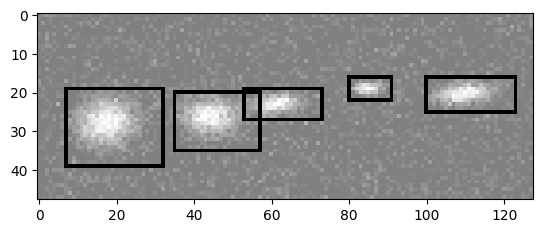

In [10]:
# Generate test image
X, y = make_data(1)
print("X shape:", X.shape)
print("y shape:", y.shape)

out = show_predict(X[0], y[0])
print(out)

In [11]:
model = baby_YOLO_conv()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 128, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 q_conv2d (QConv2D)             (None, 48, 128, 16)  160         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 24, 64, 16)   0           ['q_conv2d[0][0]']               
                                                                                                  
 batch_normalization (BatchNorm  (None, 24, 64, 16)  64          ['max_pooling2d[0][0]']      

In [12]:
model.compile(loss=loss_func, optimizer=opt)

In [13]:
batch_size = 32
X_train, y_train = make_data(num_samples=batch_size * 400)
print(X_train.shape)
print(y_train.shape)

(12800, 48, 128, 1)
(12800, 3, 8, 5)


In [14]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=10, shuffle=True)

Epoch 1/10
400/400 [==============================] - 16s 36ms/step - loss: 54.8080
Epoch 2/10
400/400 [==============================] - 14s 36ms/step - loss: 14.8519
Epoch 3/10
400/400 [==============================] - 14s 36ms/step - loss: 11.6775
Epoch 4/10
400/400 [==============================] - 14s 36ms/step - loss: 10.6010
Epoch 5/10
400/400 [==============================] - 14s 35ms/step - loss: 8.7200
Epoch 6/10
400/400 [==============================] - 14s 36ms/step - loss: 8.7097
Epoch 7/10
400/400 [==============================] - 14s 36ms/step - loss: 8.0413
Epoch 8/10
400/400 [==============================] - 14s 36ms/step - loss: 7.3622
Epoch 9/10
400/400 [==============================] - 14s 35ms/step - loss: 7.6188
Epoch 10/10
400/400 [==============================] - 14s 36ms/step - loss: 6.5214


In [15]:
model.save_weights('/content/FOLO.h5')

In [ ]:
model.load_weights('/content/drive/MyDrive/FOLO48x128/FOLO.weights2.h5')

In [18]:
dir(hls4ml)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'backends',
 'converters',
 'model',
 'report',
 'reseed',
 'utils',
 'version_tuple',
 'writer']

In [17]:
from hls4ml.optimization import optimize_keras_model_for_hls4ml
from hls4ml.optimization.attributes import get_attributes_from_keras_model
from hls4ml.optimization.keras import optimize_model
from hls4ml.optimization.keras.utils import get_model_sparsity
from hls4ml.optimization.objectives import ParameterEstimator
from hls4ml.optimization.objectives.vivado_objectives import VivadoDSPEstimator
from hls4ml.optimization.scheduler import PolynomialScheduler

ModuleNotFoundError: No module named 'hls4ml.optimization'

In [16]:
sparsity, layers = get_model_sparsity(model)
print(f'Baseline Keras sparsity, overall: {sparsity}')
print(f'Baseline Keras sparsity, per-layer: {layers}')

NameError: name 'get_model_sparsity' is not defined

In [ ]:
pr_epochs = 10
rtol = 1.6
metric, increasing = MeanSquaredError(), False

In [ ]:
scheduler = PolynomialScheduler(5, final_sparsity=0.5)
model_attributes = get_attributes_from_keras_model(model)

In [21]:
class KReduce(tf.keras.layers.Layer):
    '''Keras implementation of custom layer'''

    def __init__(self):
        super().__init__()

    def call(self, inputs):
        # inputs: a tensor of shape(8,3,15)
        return inputs[:, :, :, 0] # We want our hardware model output to be of shape (1,8,3,1)

class HReduce(hls4ml.model.layers.Layer):
    '''hls4ml implementation of custom layer'''

    def initialize(self):
        inp = self.get_input_variable()
        shape = list(inp.shape)
        shape[-1] = 1 # new output shape is (1,8,3,1)

        dims = ['OUT_HEIGHT_{}'.format(self.index), 'OUT_WIDTH_{}'.format(self.index), 'N_FILT_{}'.format(self.index)]

        self.add_output_variable(shape, dims)

def parse_reduce_layer(keras_layer, input_names, input_shapes, data_reader):
    '''Parser for converter'''

    layer = {}
    layer['class_name'] = 'HReduce'
    layer['name'] = keras_layer['config']['name']
    layer['n_in'] = input_shapes[0][1]*input_shapes[0][2]
    layer['grid_size'] = grid_size
    outshape = [[None, 3, 8]]

    if input_names is not None:
        layer['inputs'] = input_names

    return layer, outshape

# HLS model layer configuration
red_config_template = """struct config{index} : nnet::reduce_config {{
    static const unsigned n_in = {n_in};
    static const unsigned grid_size = {grid_size};
}};\n"""

red_function_template ='nnet::reduce<{input_t}, {output_t}, {config}>({input}, {output});'
red_include_list = ['nnet_utils/nnet_reduce.h']

class HReduceConfigTemplate(hls4ml.backends.template.LayerConfigTemplate):
    def __init__(self):
        super().__init__(HReduce)
        self.template = red_config_template

    def format(self, node):
        params = self._default_config_params(node)
        return self.template.format(**params)

class HReduceFunctionTemplate(hls4ml.backends.template.FunctionCallTemplate):
    '''New layer function template'''

    def __init__(self):
        super().__init__(HReduce, include_header=red_include_list)
        self.template = red_function_template

    def format(self, node):
        params = self._default_function_params(node)
        return self.template.format(**params)

# Register the converter for custom Keras layer
hls4ml.converters.register_keras_layer_handler('KReduce', parse_reduce_layer)

# Register the hls4ml's IR layer
hls4ml.model.layers.register_layer('HReduce', HReduce)

for backend_id in ['Vitis']:
    # Register the optimization passes (if any)
    backend = hls4ml.backends.get_backend(backend_id)

    # Register template passes for the given backend
    backend.register_template(HReduceConfigTemplate)
    backend.register_template(HReduceFunctionTemplate)

    # Register HLS implementation
    backend.register_source(os.path.abspath("lambda_cpp/nnet_reduce.h"))

In [22]:
class quantized_relu(quantized_relu):
    ''' Workaround for quantized_relu __name__ not found bug '''
    def __init__(self, W, I):
        super(quantized_relu, self).__init__(W, I)
        self.__name__ = 'quantized_relu'


def FOLO_conv_reduce():
    """
    FOLO model architecture using standard qkeras layers.

    :return: qkeras model
    """

    tf.compat.v1.reset_default_graph()
    x = inputs = keras.Input(shape=(48, 128, 1), name='input_1')

    x = QConv2D(16, kernel_size=3, padding='same', kernel_quantizer=quantized_bits(16,4,alpha=1), bias_quantizer=quantized_bits(8,3,alpha=1), kernel_initializer='lecun_uniform', activation='relu')(x)
    x = MaxPool2D()(x)
    x = BatchNormalization()(x)

    x = QConv2D(16, kernel_size=3, padding='same', kernel_quantizer=quantized_bits(18,5,alpha=1), bias_quantizer=quantized_bits(15,4,alpha=1), kernel_initializer='lecun_uniform', activation='relu')(x)
    x = MaxPool2D()(x)
    x = BatchNormalization()(x)

    x = QConv2D(16, kernel_size=3, padding='same', kernel_quantizer=quantized_bits(16,3,alpha=1), bias_quantizer=quantized_bits(9,2,alpha=1), kernel_initializer='lecun_uniform', activation='relu')(x)
    x = MaxPool2D()(x)
    x = BatchNormalization()(x)

    x = QConv2D(16, kernel_size=3, padding='same', kernel_quantizer=quantized_bits(18,5,alpha=1), bias_quantizer=quantized_bits(12,5,alpha=1), kernel_initializer='lecun_uniform', activation='relu')(x)
    x = MaxPool2D()(x)
    x = BatchNormalization()(x)

    x_prob = QConv2D(1, kernel_size=3, padding='same', name='x_prob', activation='sigmoid', kernel_quantizer=quantized_bits(13,3,alpha=1), bias_quantizer=quantized_bits(5,3,alpha=1), kernel_initializer='lecun_uniform')(x)
    x_boxes = QConv2D(4, kernel_size=3, padding='same', name='x_boxes', kernel_quantizer=quantized_bits(19,5,alpha=1), bias_quantizer=quantized_bits(7,5,alpha=1), kernel_initializer='lecun_uniform')(x)

    x = Concatenate()([x_prob, x_boxes])

    x = KReduce()(x)

    model = tf.keras.models.Model(inputs, x)
    return model

model_reduce = FOLO_conv_reduce()
model_reduce.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 128, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 q_conv2d (QConv2D)             (None, 48, 128, 16)  160         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 24, 64, 16)   0           ['q_conv2d[0][0]']               
                                                                                                  
 batch_normalization (BatchNorm  (None, 24, 64, 16)  64          ['max_pooling2d[0][0]']      

In [23]:
model_reduce.load_weights('/content/FOLO.h5')

In [24]:
def print_dict(d, indent=0):
    """
    Prints dictionary to view hls4ml model config

    :return: Keras model
    """

    align = 20
    for key, value in d.items():
        print('  ' * indent + str(key), end='')
        if isinstance(value, dict):
            print()
            print_dict(value, indent+1)
        else:
            print(':' + ' ' * (20 - len(key) - 2 * indent) + str(value))

In [25]:
config = hls4ml.utils.config_from_keras_model (model_reduce,
                                                   default_precision = 'ap_fixed<16,8>',
                                                   granularity = 'name')

strategy = "Latency"
rf = 1
tracing = True
OUT_DIR = f'yolo_on_frame_grabber'

config["Model"]["Trace"] = tracing

config["Model"]["Strategy"] = "Resource"
for layer in config["LayerName"]:
    config["LayerName"][layer]["Trace"] = tracing
    config["LayerName"][layer]['ReuseFactor'] = rf
    config["LayerName"][layer]["Strategy"] = strategy

config["LayerName"]["q_conv2d"]['ReuseFactor'] = 1
config["LayerName"]["q_conv2d"]["Strategy"] = "Latency"
config["LayerName"]["q_conv2d"]["Precision"]["weight"] = "ap_fixed<15,3>"
config["LayerName"]["q_conv2d"]["Precision"]["bias"] = "ap_fixed<7,0>"

# config["LayerName"]["batch_normalization"]["Precision"]["scale"] = "ap_fixed<7,7>"
# config["LayerName"]["batch_normalization"]["Precision"]["bias"] = "ap_fixed<9,3>"

config["LayerName"]["q_conv2d_1"]['ReuseFactor'] = 4
config["LayerName"]["q_conv2d_1"]["Strategy"] = "Latency"
config["LayerName"]["q_conv2d_1"]["Precision"]["weight"] = "ap_fixed<16,2>"
config["LayerName"]["q_conv2d_1"]["Precision"]["bias"] = "ap_fixed<7,2>"

# config["LayerName"]["batch_normalization_1"]["Precision"]["scale"] = "ap_fixed<6,3>"
# config["LayerName"]["batch_normalization_1"]["Precision"]["bias"] = "ap_fixed<8,3>"

config["LayerName"]["q_conv2d_2"]['ReuseFactor'] = 12
config["LayerName"]["q_conv2d_2"]["Strategy"] = "Resource"
config["LayerName"]["q_conv2d_2"]["Precision"]["weight"] = "ap_fixed<16,3>"
config["LayerName"]["q_conv2d_2"]["Precision"]["bias"] = "ap_fixed<8,2>"

# config["LayerName"]["batch_normalization_2"]["Precision"]["scale"] = "ap_fixed<4,1>"
# config["LayerName"]["batch_normalization_2"]["Precision"]["bias"] = "ap_fixed<7,3>"

config["LayerName"]["q_conv2d_3"]['ReuseFactor'] = 48
config["LayerName"]["q_conv2d_3"]["Strategy"] = "Resource"
config["LayerName"]["q_conv2d_3"]["Precision"]["weight"] = "ap_fixed<16,2>"
config["LayerName"]["q_conv2d_3"]["Precision"]["bias"] = "ap_fixed<10,2>"

# config["LayerName"]["batch_normalization_3"]["Precision"]["scale"] = "ap_fixed<5,1>"
# config["LayerName"]["batch_normalization_3"]["Precision"]["bias"] = "ap_fixed<9,4>"

config["LayerName"]["x_prob"]['ReuseFactor'] = 48
config["LayerName"]["x_prob"]["Precision"]["weight"] = "ap_fixed<11,2>"
config["LayerName"]["x_prob"]["Precision"]["bias"] = "ap_fixed<2,1>"

config["LayerName"]["x_boxes"]['ReuseFactor'] = 48
config["LayerName"]["x_boxes"]["Precision"]["weight"] = "ap_fixed<17,3>"
config["LayerName"]["x_boxes"]["Precision"]["bias"] = "ap_fixed<4,3>"

config["LayerName"]["k_reduce"]["Precision"]["result"] = "ap_uint<27>"

print_dict(config)

hls_model = hls4ml.converters.convert_from_keras_model(model_reduce,
                                                       hls_config = config,
                                                       io_type = 'io_stream',
                                                       output_dir = OUT_DIR,
                                                       part='xcku035-fbva676-2-e'
                                                       )

hls_model.compile()

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 48, 128, 1]], output shape: [None, 48, 128, 1]
Layer name: q_conv2d, layer type: QConv2D, input shapes: [[None, 48, 128, 1]], output shape: [None, 48, 128, 16]
Layer name: max_pooling2d, layer type: MaxPooling2D, input shapes: [[None, 48, 128, 16]], output shape: [None, 24, 64, 16]
Layer name: batch_normalization, layer type: BatchNormalization, input shapes: [[None, 24, 64, 16]], output shape: [None, 24, 64, 16]
Layer name: q_conv2d_1, layer type: QConv2D, input shapes: [[None, 24, 64, 16]], output shape: [None, 24, 64, 16]
Layer name: max_pooling2d_1, layer type: MaxPooling2D, input shapes: [[None, 24, 64, 16]], output shape: [None, 12, 32, 16]
Layer name: batch_normalization_1, layer type: BatchNormalization, input shapes: [[None, 12, 32, 16]], output shape: [None, 12, 32, 16]
Layer name: q_conv2d_2, layer type: QConv2D, input shapes: [[None, 12, 32, 16]], output shape: [None, 12, 32, 16]

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 48, 128, 1]], output shape: [None, 48, 128, 1]
Layer name: q_conv2d, layer type: QConv2D, input shapes: [[None, 48, 128, 1]], output shape: [None, 48, 128, 16]
Layer name: max_pooling2d, layer type: MaxPooling2D, input shapes: [[None, 48, 128, 16]], output shape: [None, 24, 64, 16]
Layer name: batch_normalization, layer type: BatchNormalization, input shapes: [[None, 24, 64, 16]], output shape: [None, 24, 64, 16]
Layer name: q_conv2d_1, layer type: QConv2D, input shapes: [[None, 24, 64, 16]], output shape: [None, 24, 64, 16]
Layer name: max_pooling2d_1, layer type: MaxPooling2D, input shapes: [[None, 24, 64, 16]], output shape: [None, 12, 32, 16]
Layer name: batch_normalization_1, layer type: BatchNormalization, input shapes: [[None, 12, 32, 16]], output shape: [None, 12, 32, 16]
Layer name: q_conv2d_2, layer type: QConv2D, input shapes: [[None, 12, 32, 16]], output shape: [None, 12, 32, 16]

Profiling activations (final / after optimization)
Recompiling myproject with tracing
Writing HLS project
Done
   q_conv2d
   q_conv2d_relu
   max_pooling2d
   batch_normalization
   q_conv2d_1
   q_conv2d_1_relu
   max_pooling2d_1
   batch_normalization_1
   q_conv2d_2
   q_conv2d_2_relu
   max_pooling2d_2
   batch_normalization_2
   q_conv2d_3
   q_conv2d_3_relu
   max_pooling2d_3
   batch_normalization_3
   x_prob
   x_prob_sigmoid
   x_boxes
   concatenate


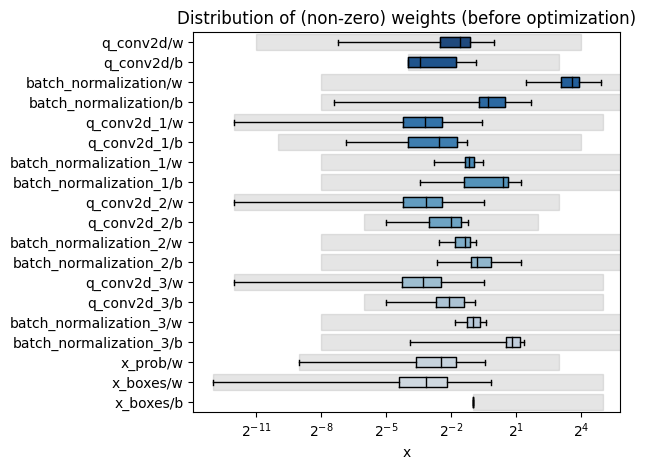

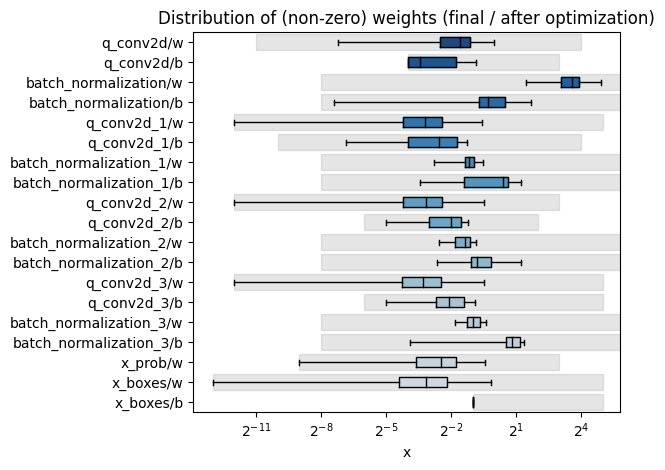

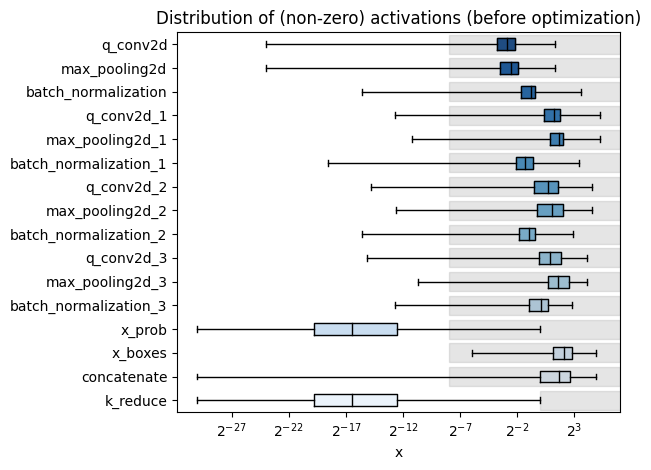

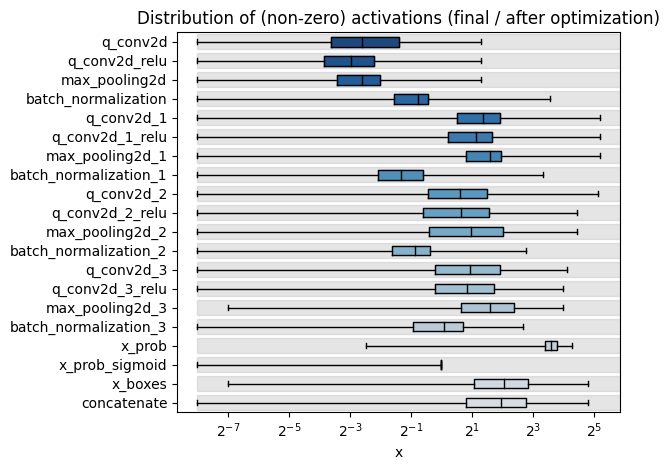

In [26]:
#Compare weights ranges between float and HLS model
X, y = make_data(10)
%matplotlib inline
plots = hls4ml.model.profiling.numerical(model=model_reduce, hls_model = hls_model, X=np.ascontiguousarray(X))

Done taking outputs for Keras model.
Recompiling myproject with tracing
Writing HLS project
Done


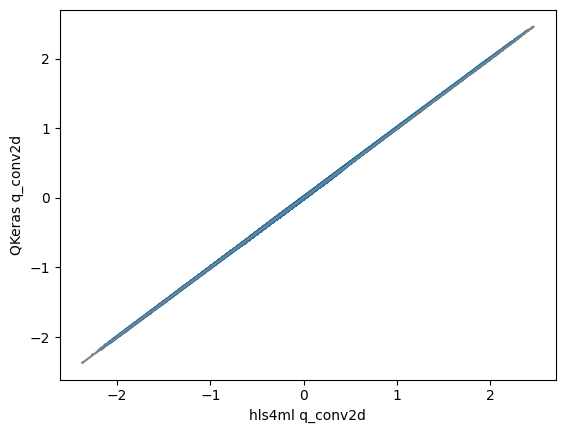

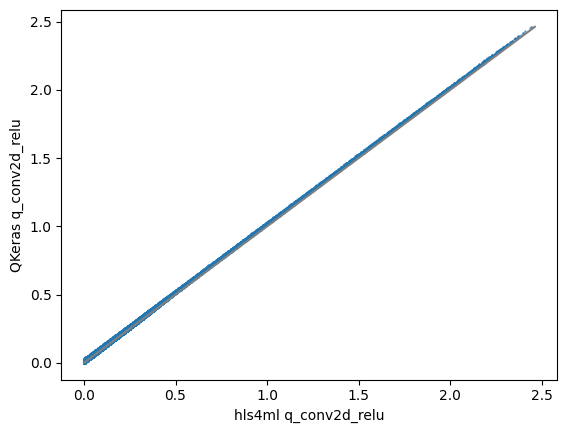

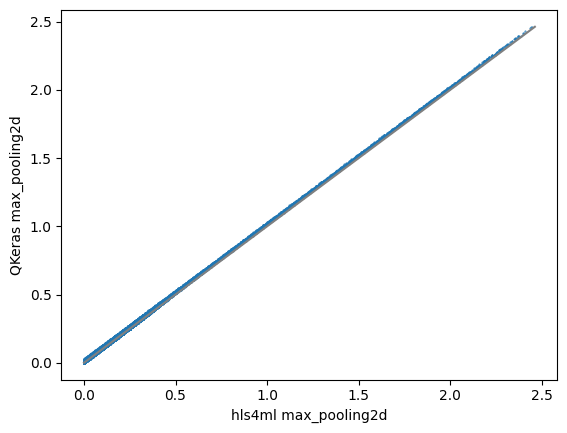

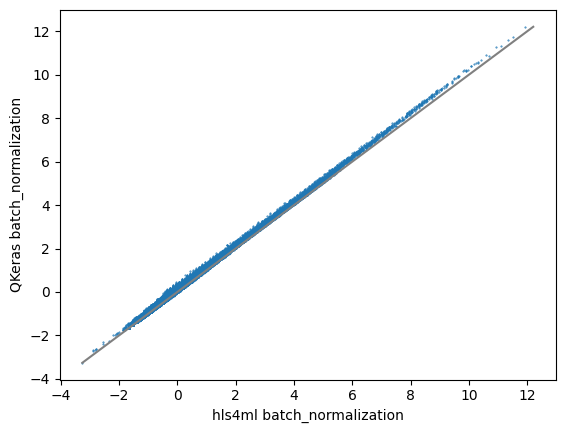

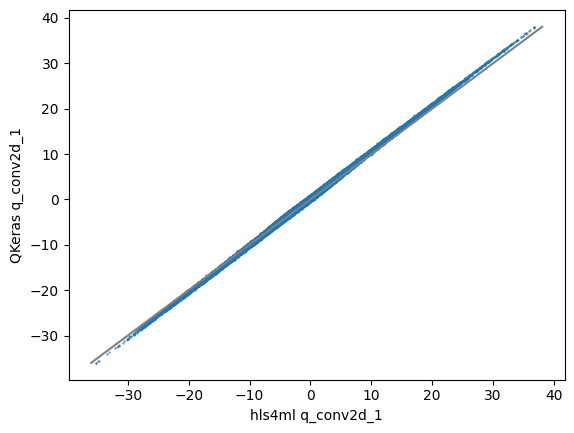

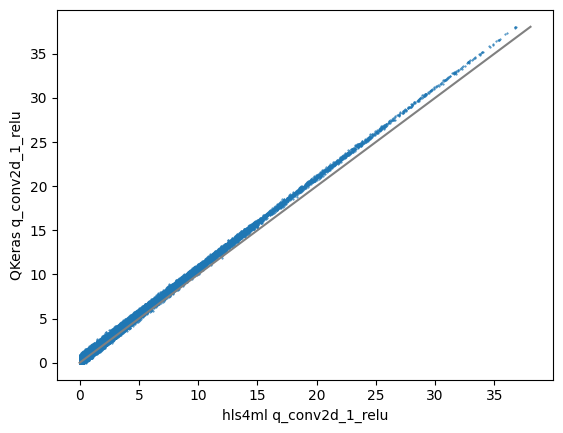

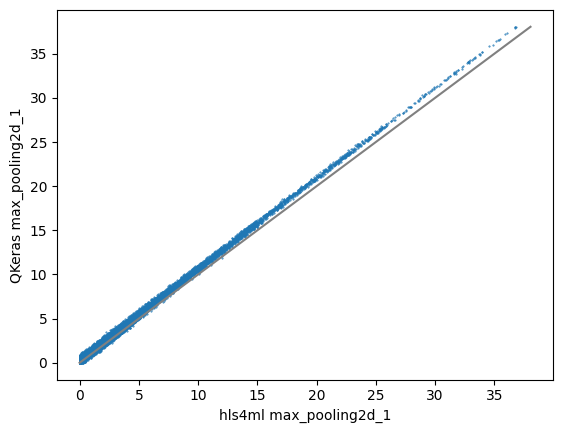

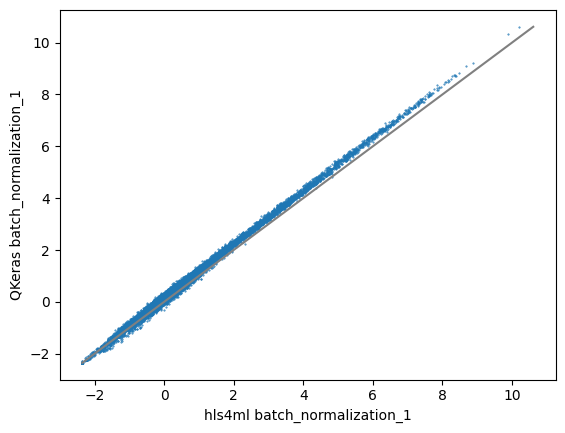

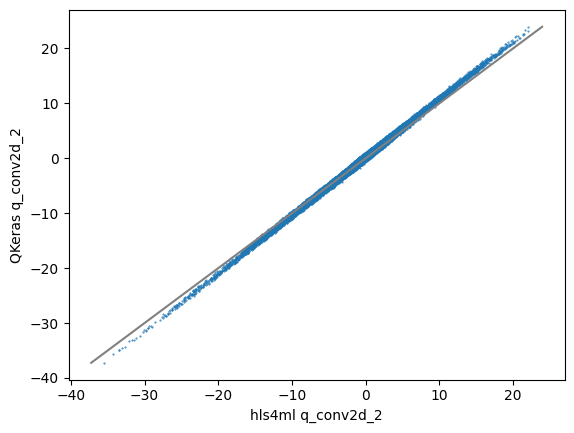

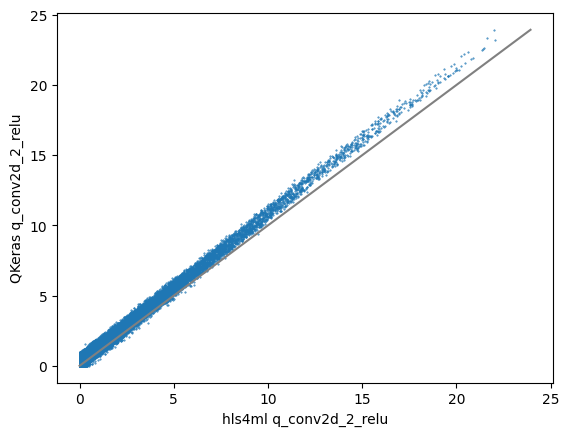

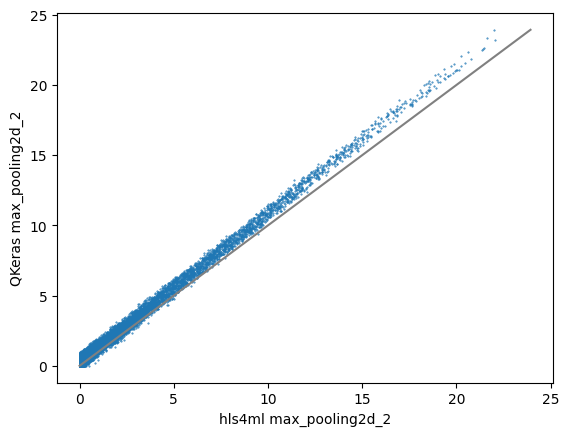

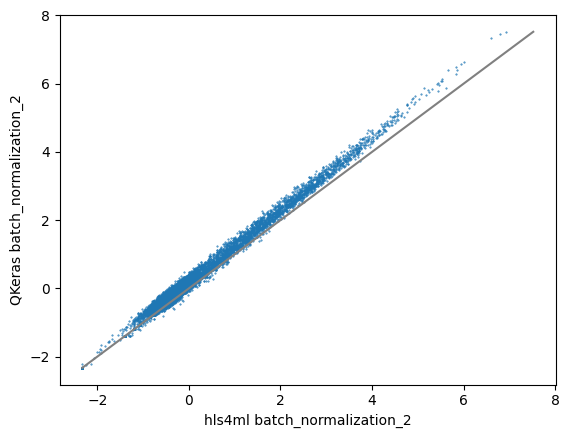

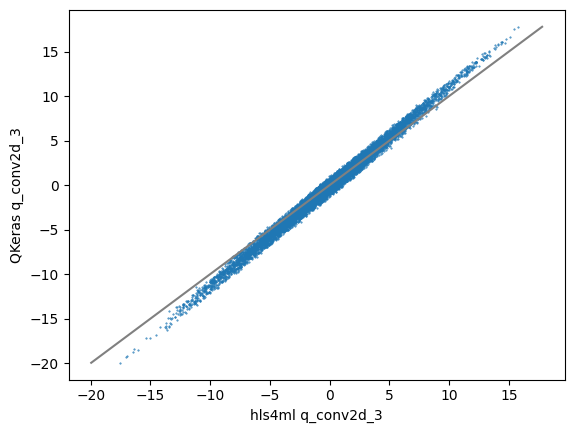

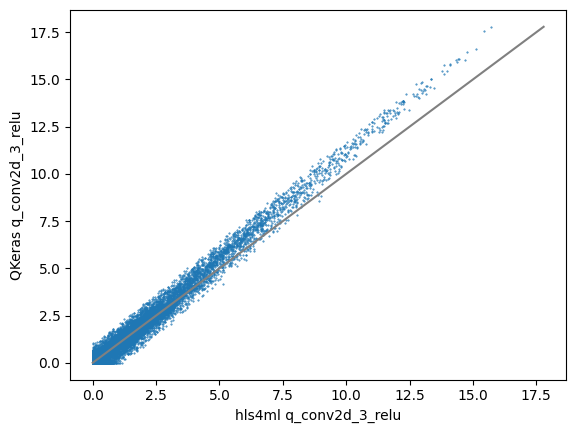

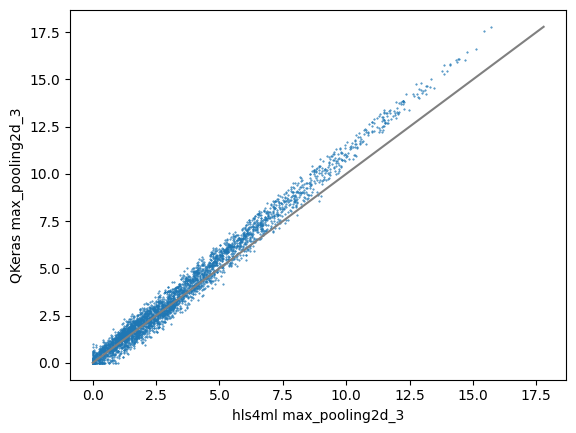

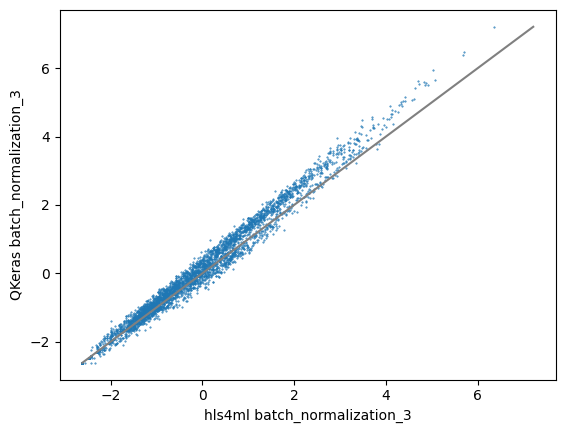

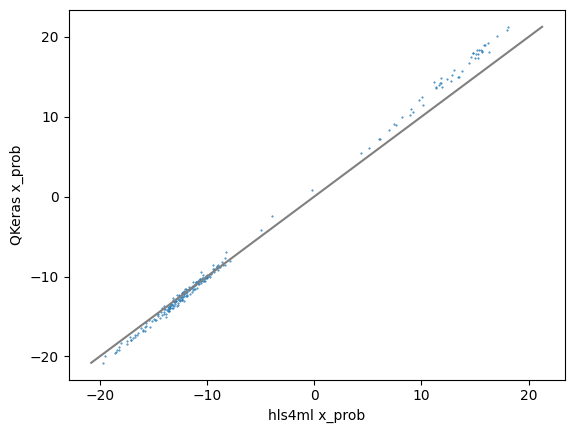

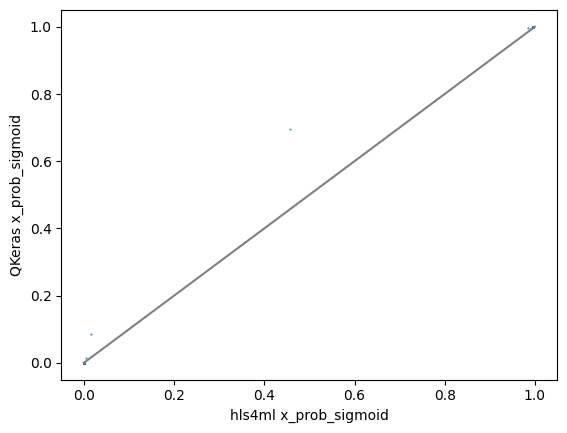

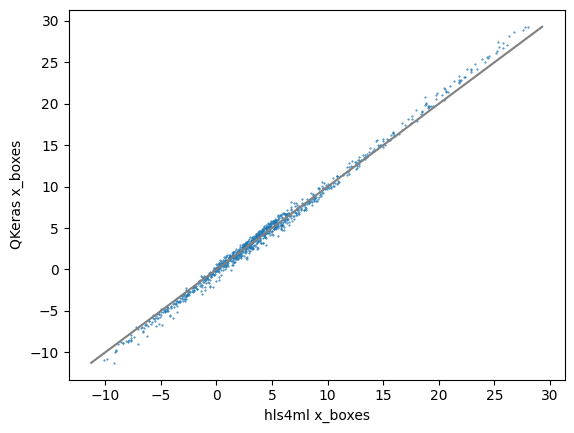

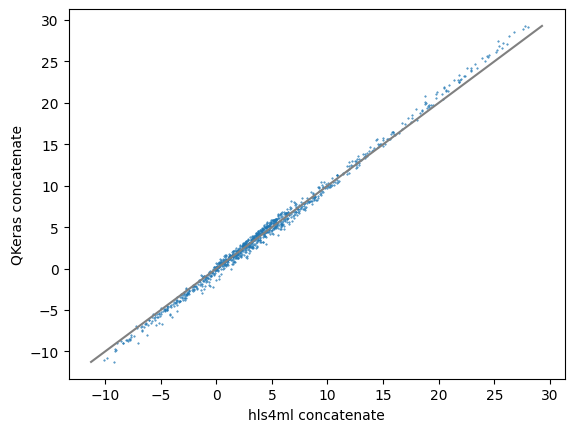

In [27]:
#Trace Model
keras_trace = hls4ml.model.profiling.get_ymodel_keras(model_reduce, np.ascontiguousarray(X))
y_hls, hls4ml_trace = hls_model.trace(np.ascontiguousarray(X))

#Compare layer outputs
for layer in hls4ml_trace.keys():
            plt.figure()
            klayer = layer
            if "_alpha" in layer:
                klayer = layer.replace("_alpha", "")
            plt.scatter(hls4ml_trace[layer].flatten(), keras_trace[klayer].flatten(), s=0.2)
            min_x = min(np.amin(hls4ml_trace[layer]), np.amin(keras_trace[klayer]))
            max_x = max(np.amax(hls4ml_trace[layer]), np.amax(keras_trace[klayer]))
            plt.plot([min_x, max_x], [min_x, max_x], c="gray")
            plt.xlabel("hls4ml {}".format(layer))
            plt.ylabel("QKeras {}".format(klayer))

In [28]:
np.savetxt(f"{OUT_DIR}/tb_data/tb_input_features.dat", X_test[0:100].reshape(X_test[0:100].shape[0], -1), delimiter=' ')
np.savetxt(f"{OUT_DIR}/tb_data/tb_output_predictions.dat", np.zeros(y_test[0:100].shape[0:3]).reshape(y_test[0:100].shape[0], -1), delimiter=' ') # no need to save true y's since we have to parse bitstring outputs

NameError: name 'X_test' is not defined

In [ ]:
hls_model.build(csim=True, synth=False, cosim=False, validation=False, vsynth=False, fifo_opt=False, export=False)

Exception: Vivado HLS installation not found. Make sure "vivado_hls" is on PATH.

In [ ]:
hls_predictions = np.genfromtxt(OUT_DIR + "/tb_data/csim_results.log", delimiter=' ')

In [ ]:
def bit_range(num, end_idx, start_idx):
    """
    Extracts bit range from integer

    :param num: Number from which to extract bits
    :param end_idx: Ending index (inclusive) from the right in the binary representation
    :param start_idx: Starting index (inclusive) from the right in the binary representation
    :return: Extracted bit range as an integer
    """
    mask = ((1 << (end_idx + 1)) - 1) - ((1 << start_idx) - 1)
    return (num & mask) >> start_idx


def show_predict_hardware(X, y):
    """
    Display single prediction results from the hardware (parsed from the output bit strings)

    :param X: Data sample input
    :param y: Model predictions
    """

    X = X.copy()
    channels = np.zeros((6), dtype=np.uint64)

    for i in range(64):
        channels[0] = bit_range(int(y[i]), 26, 26)
        channels[1] = bit_range(int(y[i]), 25, 19)
        channels[2] = bit_range(int(y[i]), 18, 13)
        channels[3] = bit_range(int(y[i]), 12, 6)
        channels[4] = bit_range(int(y[i]), 5, 0)

        if channels[0] < 1:
            continue

        color = 255
        # bounding box
        cv2.rectangle(X, (channels[1], channels[2]), (channels[3], channels[4]), -1, 1)

        print("prob: " + str(channels[0]) + ", x1: " + str(int(channels[1])) + ", y1: " + str(int(channels[2])) + ", x2: " + str(int(channels[3])) + ", y2: " + str(int(channels[4])))

    plt.imshow(X, cmap="gray")

show_predict_hardware(X[0], hls_predictions[0])

NameError: name 'hls_predictions' is not defined

In [ ]:
# Comment out the following two lines to disable FIFO depth optimization
config['Flows'] = ['vivado:fifo_depth_optimization']
hls4ml.model.optimizer.get_optimizer('vivado:fifo_depth_optimization').configure(profiling_fifo_depth=100_000)

In [ ]:
hls_model = hls4ml.converters.convert_from_keras_model(model_reduce,
                                                       hls_config = config,
                                                       io_type = 'io_stream',
                                                       output_dir = OUT_DIR,
                                                       part='xcku035-fbva676-2-e'
                                                       )

hls_model.compile()

In [ ]:
BOARD = "octo" # Insert board name here ("octo" or "quad")

shutil.copytree(f"board_files/{BOARD.lower()}/02_coaxlink", "my-frame-grabber-test_TEMPLATE/02_coaxlink", dirs_exist_ok=True)
shutil.copytree(f"board_files/{BOARD.lower()}/sim", "my-frame-grabber-test_TEMPLATE/04_ref_design/sim", dirs_exist_ok=True)
shutil.copy(f"board_files/{BOARD.lower()}/CustomLogic.h", "my-frame-grabber-test_TEMPLATE/05_model_design_hls/srcs")
shutil.copy(f"board_files/{BOARD.lower()}/create_vivado_project.tcl", "my-frame-grabber-test_TEMPLATE/03_scripts")

In [ ]:
!cp -r {OUT_DIR}/firmware/nnet_utils {OUT_DIR}/firmware/weights {OUT_DIR}/firmware/ap_types {OUT_DIR}/firmware/parameters.h {OUT_DIR}/firmware/defines.h my-frame-grabber-test_TEMPLATE/05_model_design_hls/srcs